### EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Uploading Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Akshata Potdar\Downloads\archive (5)\spam.csv",encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Top 5 rows of dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


##### Random 10 rows

In [5]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3175,ham,Havent still waitin as usual... ÌÏ come back s...,NaN,NaN,NaN
3912,ham,Yeah whatever lol,NaN,NaN,NaN
4842,ham,I need details about that online job.,NaN,NaN,NaN
1307,spam,"Get 3 Lions England tone, reply lionm 4 mono o...",NaN,NaN,NaN
2628,ham,Haha... They cant what... At the most tmr forf...,NaN,NaN,NaN
3194,ham,Great. P diddy is my neighbor and comes for to...,NaN,NaN,NaN
1203,ham,Thanks for understanding. I've been trying to ...,NaN,NaN,NaN
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
339,ham,U calling me right? Call my hand phone...,NaN,NaN,NaN
903,ham,Lovely smell on this bus and it ain't tobacco...,NaN,NaN,NaN


*Total rows and columns in dataset*

In [6]:
df.shape

(5572, 5)

In [7]:
print("Total Rows =",df.shape[0])
print("Total Columns =",df.shape[1])
  

Total Rows = 5572
Total Columns = 5


*Columns in dataset*

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

### DATA CLEANING

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset

*Renaming cols*

In [9]:
#Renaming the columns for better understanding

df.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
df.head()
     

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*Labelling in dataset*

Variety values either showing 'ham' or "spam" , lets martk them with 0 and 1 respectively



In [10]:
encoder = LabelEncoder()
df['Variety'] = encoder.fit_transform(df['Variety']) #allotting 0,1
df.head()

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*Dataset information*

In [11]:
#checking the use of extra columns like - Unnamed:2 , Unnamed: 3 , Unnamed: 4
print('\033[1m' + 'Information of dataset:' + '\033[0m\n\n')
df.info() 
     

Information of dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   int32 
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int32(1), object(4)
memory usage: 196.0+ KB


#### Dropping extra cols

In [12]:
#from above info we can see that last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4 has a good amount of 
#null values , so drop those columns 

df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
df.head() #check dataset again after dropping

,Variety,Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##### check duplicate data in dataset

In [13]:
print("Total Duplicated values =",df.duplicated().sum())
   

Total Duplicated values = 403


*Delete Duplicates*

In [14]:
data_set = df.drop_duplicates(keep='first') 
#Except keeping only first value delete every other matching to that particular value
 

*Check NULL values in dataset*

In [15]:
print("Total NULL values =\n\n",df.isnull().sum())
    

Total NULL values =

 Variety    0
Data       0
dtype: int64


*Size of dataset*

In [16]:
#The size property returns the number of elements in the DataFrame. 
#The number of elements is the number of rows * the number of columns.
print("Size of dataset is: ",df.size)

Size of dataset is:  11144


In [17]:
df.sample(6)

,Variety,Data
168,0,Great escape. I fancy the bridge but needs her...
4523,0,I've sent Ì_ my part..
698,0,Mum ask Ì_ to buy food home...
1664,0,ÌÏ v ma fan...
1207,0,I need you to be in my strong arms...
1392,0,"Thk shld b can... Ya, i wana go 4 lessons... H..."


*After Data Cleaning*

In [18]:
print("After DATA CLEANING : \n")
print("Total Rows :",df.shape[0],"\n Total columns :",df.shape[1])
   

After DATA CLEANING : 

Total Rows : 5572 
 Total columns : 2


### EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

*Count spam(1) and non-spam(0) mails*

In [19]:
df['Variety'].value_counts()

0    4825
1     747
Name: Variety, dtype: int64

In [20]:
#For tokenize the words , need to dowload the 'punkt' module
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Akshata
[nltk_data]     Potdar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

*Words in each text*

In [21]:
df['words'] = df['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
df.sample(8)

,Variety,Data,words
5045,0,Desires- u going to doctor 4 liver. And get a ...,22
4065,0,Fyi I'm gonna call you sporadically starting a...,26
3270,1,You have 1 new voicemail. Please call 08719181...,10
2670,0,Yes. They replied my mail. I'm going to the ma...,26
4421,0,MMM ... Fuck .... Merry Christmas to me,8
5399,0,And he's apparently bffs with carly quick now,9
5108,0,The sign of maturity is not when we start sayi...,32
3424,0,True. Its easier with her here.,8


*Sentences in each mail*

In [22]:
df['sentence'] = df['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
df.sample(8)

,Variety,Data,words,sentence
5346,0,"My Parents, My Kidz, My Friends n My Colleague...",32,4
2717,0,Okie.. Thanx..,4,1
4829,0,"The word \Checkmate\"" in chess comes from the ...",38,1
985,0,Carlos says he'll be at mu in &lt;#&gt; minutes,16,1
2179,0,And popping &lt;#&gt; ibuprofens was no help.,14,1
560,0,Hi msg me:)i'm in office..,10,1
5567,1,This is the 2nd time we have tried 2 contact u...,35,4
4569,1,Wanna have a laugh? Try CHIT-CHAT on your mobi...,37,3


*Characters in each text*

In [23]:
df['chars']= df['Data'].apply(len)
df.sample(8)

,Variety,Data,words,sentence,chars
5381,1,You have 1 new message. Call 0207-083-6089,8,2,42
197,0,is your hamster dead? Hey so tmr i meet you at...,16,2,64
1682,0,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...,33,3,126
4915,0,"Just dropped em off, omw back now",8,1,33
3684,0,Wake me up at &lt;#&gt; am morning:),15,1,38
483,0,Thank you baby! I cant wait to taste the real ...,13,2,54
3751,0,Why are u up so early?,7,1,22
3662,0,Frnd s not juz a word.....not merely a relatio...,37,1,160


*Statistics summary of Spam mails*

In [24]:
df[df['Variety'] == 1][['words','sentence','chars']].describe()
 

,words,sentence,chars
count,747.000000,747.000000,747.000000
mean,27.891566,3.017403,138.866131
std,6.867007,1.528449,29.183082
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.500000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,8.000000,224.000000


*Statistics summary of Non-Spam mails*

In [25]:
df[df['Variety'] == 0][['words','sentence','chars']].describe()
 

,words,sentence,chars
count,4825.000000,4825.000000,4825.000000
mean,17.271917,1.808705,71.023627
std,13.988885,1.328227,58.016023
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,33.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,92.000000
max,220.000000,28.000000,910.000000


AS WE CAN SEE NON-SPAM MAILS HAVE LARGE NUMBER OF WORDS , CHARACTERS , SENTENCES IN COMPARE TO THE SPAM MAILS. SO THIS IS THE DIFFERENTIATING FACTOR

### HEAT MAP

[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

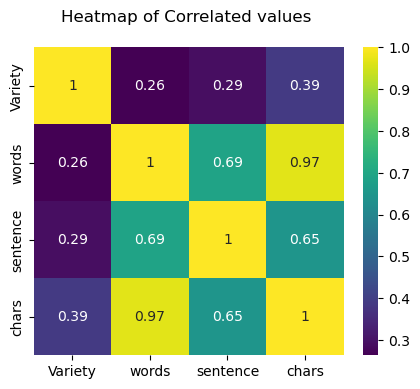

In [26]:
fig, ax = plt.subplots(figsize = (5, 4))
sea.heatmap(df.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')
  

#### GRAPHICAL REPRESENTATION OF THE MAILS

FOR WORDS

<Figure size 800x500 with 0 Axes>

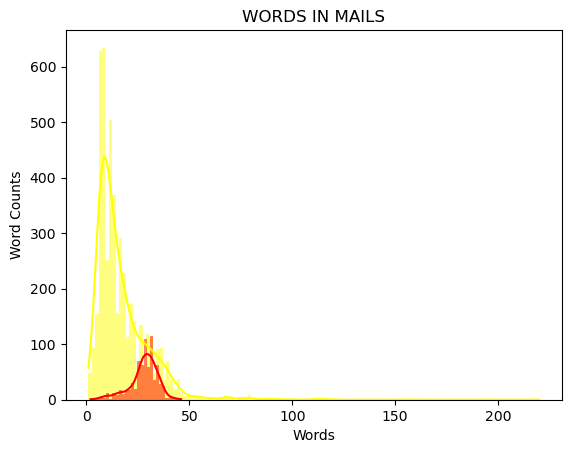

In [27]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['words'], color="yellow", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS") 
plt.show()

*FOR CHARACTERS*

<Figure size 800x500 with 0 Axes>

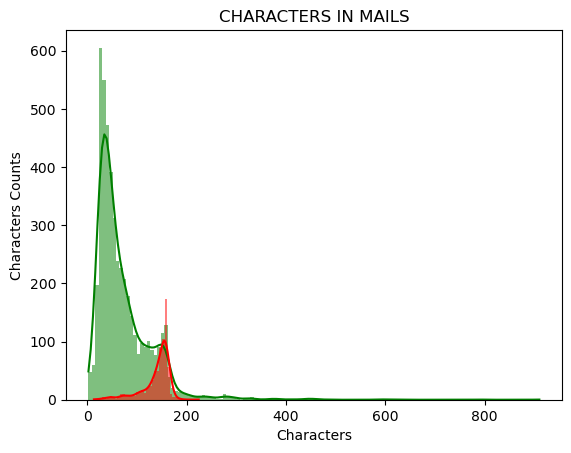

In [28]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['chars'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()

*FOR SENTENCES*

<Figure size 800x500 with 0 Axes>

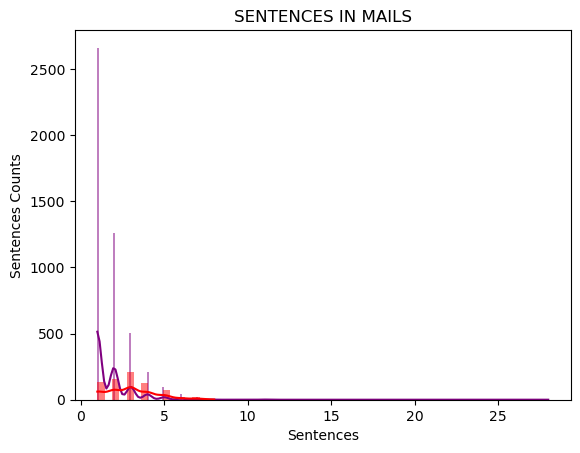

In [29]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(df[df['Variety'] == 0]['sentence'], color="purple", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(df[df['Variety'] == 1]['sentence'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel( "Sentences")
ax.set_title( "SENTENCES IN MAILS")
plt.show()

#### PAIRPLOT GRAPHICAL REPRESENTATION

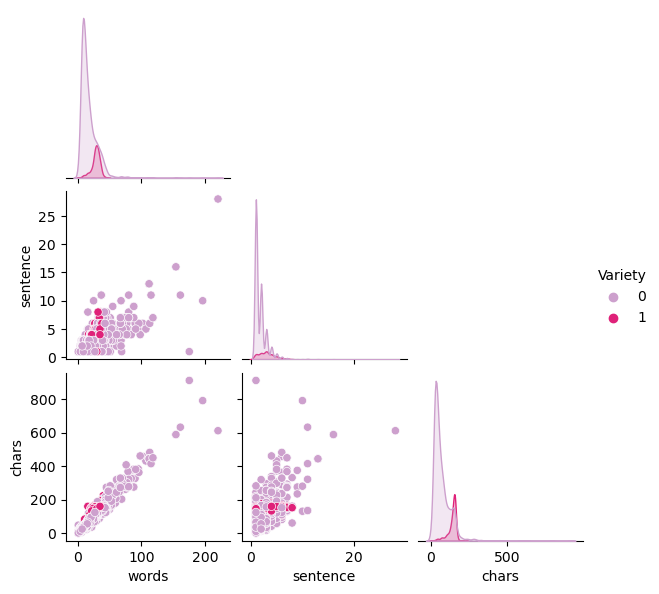

In [30]:
sea.pairplot(df,hue='Variety',corner=True,height=2,palette='PuRd');
     


#### TEXT PRE-PROCESSING

Text preprocessing involves transforming text into a clean and consistent format that can then be fed into a model for further analysis and learning.

#### *Looking for stopwords*

In [31]:
nltk.download('stopwords')
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to C:\Users\Akshata
[nltk_data]     Potdar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

*Looking for Punctuation marks*

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

*Stemming method*

In [33]:
ps = PorterStemmer()
ps.stem('played')

'play'

*function for all steps of Pre-processing*

In [34]:
def changement(a):

    #LOWER CASE
    a = a.lower()

    #TOKENIZATION
    a = nltk.word_tokenize(a)
    
    #REMOVING SPECIAL CHARACTERS
    alphanum = []
    for i in a:
        if i.isalnum():
            alphanum.append(i)
    
    a = alphanum[:]
    alphanum.clear()
    
    #DELETE ALL STOPWORDS AND PUNCTUATION
    for i in a:
        if i not in stopwords.words('english') and i not in string.punctuation:
            alphanum.append(i)
            
    a = alphanum[:]
    alphanum.clear()
    
    #STEMMING
    for i in a:
        alphanum.append(ps.stem(i))
    
            
    return " ".join(alphanum)

*Pre-processing on the particular mail as examples*

In [35]:
changement("The only problem with a pencil, is that they do not stay sharp long enough?")
  

'problem pencil stay sharp long enough'

In [36]:
changement("Last Chance! Claim ur å£150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ.")


'last chanc claim ur worth discount voucher today text shop 85023 savamob offer mobil cs savamob pobox84 m263uz'

#### *Apply Pre-processed texts to all dataset*

In [37]:
df['pre-processed'] = df['Data'].apply(changement)
df.tail(8)

,Variety,Data,words,sentence,chars,pre-processed
5564,0,Why don't you wait 'til at least wednesday to ...,16,1,67,wait least wednesday see get
5565,0,Huh y lei...,4,1,12,huh lei
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,30,1,147,remind o2 get pound free call credit detail gr...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,9,1,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,27,1,125,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,7,2,26,rofl true name


*Check the dimensions again*

In [38]:
df.shape

(5572, 6)

### WORDCLOUDS ON DATASET

#### Apply Wordcloud to the NON-SPAM MAILS

In [39]:
!pip install wordcloud 

In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
 

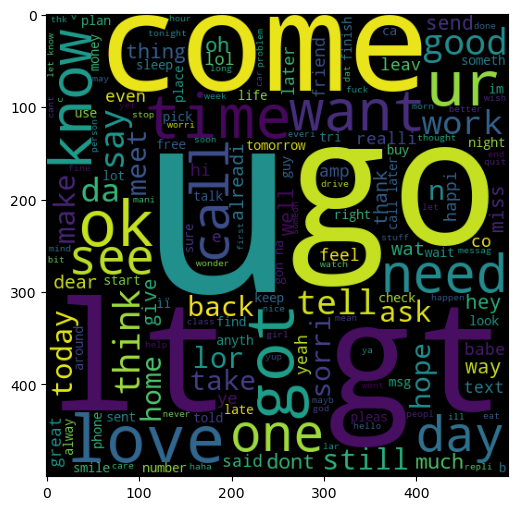

In [42]:
non_spam = wc.generate(df[df['Variety'] == 0]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(non_spam)
     

#### Apply Wordcloud to the SPAM MAILS

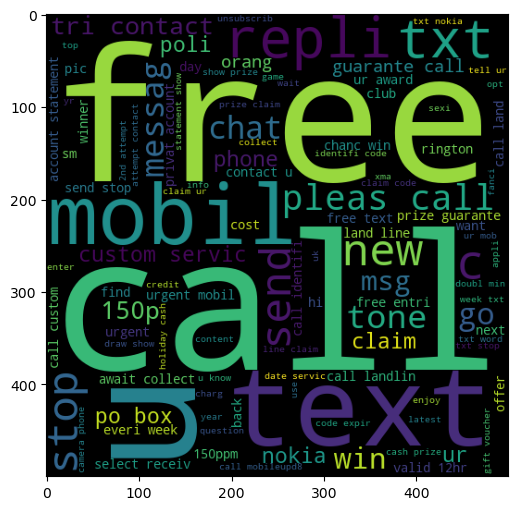

In [43]:
spam = wc.generate(df[df['Variety'] == 1]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam)

### MODEL BUILDING

#### Assigning variable X and Y to columns

In [44]:
Y = df['Variety'].values
X = df['pre-processed']
     

In [45]:
X.shape
     

(5572,)

In [46]:
Y.shape
     

(5572,)

#### Train-Test Split

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)
  

In [48]:
X_train.shape

(4457,)

In [49]:
print("Total No of Rows  :",X.shape[0])
print("Rows for training :",X_train.shape[0])
print("Rows for testing  :",X_test.shape[0])

Total No of Rows  : 5572
Rows for training : 4457
Rows for testing  : 1115


#### Feature Extraction

In [50]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)
  

In [51]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
    

In [52]:
X_train_features.shape

(4457, 3000)

### TRAIN THE MODEL USING LOGISTIC REGRESSION

In [53]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)
     

LogisticRegression()

### Model Evaluation

#### Prediction on training data

In [54]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9701592999775633


In [55]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9701592999775633


In [56]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9721973094170404


#### DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART



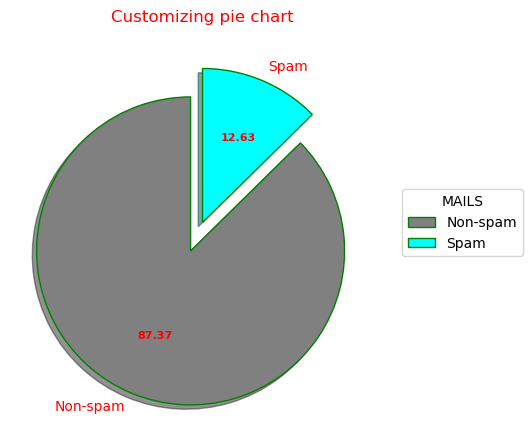

In [57]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "grey", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(data_set['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

### EMAIL SPAM DETECTOR

#### Take User Input

In [64]:
user_mail = input("Enter the text of the email :\n\n")
  

Enter the text of the email :

Open The Link Upload Resume After Two Days Interview Schedule Apply Now:  www.anaxt.co.in Job Description:-  1)QA Engineer Good knowledge of aptitude for analysis and problem solving. Should have basic knowledge of website Testing. Should have good communication skills Should be ready to learn new things Self Dependable, Self-motivated and proactive


In [65]:
processed=changement(user_mail)
processed

'open link upload resum two day interview schedul appli job descript 1 qa engin good knowledg aptitud analysi problem solv basic knowledg websit test good commun skill readi learn new thing self depend proactiv'

#### Apply Feature Extraction

In [66]:
input_data_features = feature_extraction.transform([processed])

#### Perform Prediction Over User Input

In [67]:
predicted_output = model.predict(input_data_features)


In [68]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Non-Spam mail


#### Showed the "Non-Spam mail" as result